# What is osteoporosis ?

![1.jpg](1.jpg)

Osteoporosis is a disease in which bone weakening increases the risk of a broken bone. The cause is the massive loss of minerals, which leads to the continuous loss of calcium in the bones into the blood. It is the most common reason for a broken bone among the elderly.

![2.jpg](2.jpg)

Bones that commonly break include the vertebrae in the spine, the bones of the forearm, and the hip.
Until a broken bone occurs there are typically no symptoms. Bones may weaken to such a degree that a break may occur with minor stress or spontaneously.

![4.jpg](4.jpg)

Osteoporosis may be due to lower-than-normal maximum bone mass and greater-than-normal bone loss.
Osteoporosis is defined as a bone density of 2.5 standard deviations below that of a young adult.



# Diagnosis tool

![3.jpg](3.jpg)

### Dual X-ray absorptiometry (DXA)

   * Measuring the bone mineral density (BMD)
   * The gold standard for the diagnosis of osteoporosis
   * The rarity of DXA instruments
   * High cost 
   * Radiation 

### Quantitative CT

   * It gives reports precise volumetric mineral density in mg/cm3.
   * It requires a high radiation dose.

### Ultrasound

   * Portable
   * No radiation 
   * Low cost

# Information theory entropy

![5.jpg](5.jpg)

Information theory entropy is estimated backscatter signal uncertainty and complexity.

The information theory is called the scattering substructure.

It includes regular, random, and clustered three conditions.

When the entropy value is low, it means amount of information is not rich, which means that the backscatter signal has low uncertainty. When the entropy value is high, it means that the information is rich and highly uncertain.


# Purpose

### Information theory entropy characteristics: 
   * Non-mathematic model
   * The signal itself does not need to follow a specific distribution
   * More flexible and versatile in application

## *Is it feasible to apply the existing statistical model to the backscatter signal analysis of bone tissue (which belongs to hard tissue)？*

# Method

### Experiment setup


   #### phantom
   Open-cell rigid foam (OCRF) was purchased from Sawbone, with five different-density imitations of 180mm×130mm×40mm in size, and the unit of density is pounds per cubic foot (PCF), respectively 5.5, 7.5, 15 , 20, 30 PCF.
   For the convenience of experiment, we cut the phantom blocks of different densities into 85mm×60mm×40mm cuboid, as shown in the figure below.
   
   #### ultrasound imaging system
   The use of a single-array ultrasonic imaging system. The transducer specifications used a 3.5 MHz diameter focused transducer (OLYMPUS, V384) with a diameter of 6.35 mm for scanning, and each phantom was scanned five times.
   
![6.jpg](6.jpg)


### Entropy image reconstruction and image analysis

![7.jpg](7.jpg)



# python code

In [1]:
import os 
from PIL import Image  
import matplotlib.pyplot as plt 
import numpy as np
import sys
import cv2
import scipy.io as sio
import h5py
from scipy.signal import hilbert
import math
import random
import scipy
import warnings
from skimage.transform import resize
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings("ignore")

# setting init parameter

In [20]:
MHz=10 ** 6;
mm=10**(-3);
cm=10**(-2);
um=10**(-6);
us=10**(-6);
inch=2.54*cm;

centerfreq=3.5*MHz; # center frequency 單陣元 3.5MHz:3.5
samplingrate=70*MHz; # sampling ratez 單陣元 3.5MHz:70
soundspeed_1=1572;  # 5.5 PCF
soundspeed_2=1583;  # 7.5 PCF
soundspeed_3=1644;  # 15 PCF
soundspeed_4=1700;  # 20 PCF
soundspeed_5=1742;  # 30 PCF
pulselength=0.6*us*samplingrate; # pulselength 單陣元 3.5 MHz_focuse:0.6
windowsize=3; # window size for parametric imaging
wor=0.5; # window overlop ratio of parametric imaging in the unit %
imagewidth=2*cm; 
bmodeDR=40; # dynamic range of B-scan
colorlowerlimit=3.8;
colorhigherlimit=5.32;
fusiontransparency=0.1; # transparency parameter for image fusion
threshold=0.01;

cm_data=np.loadtxt('pseudocolor5.txt')
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

# load file

In [36]:
def loadFile(fileName):
    f = open(fileName,'r')
    rf_temp = []
    for line in f:
        rf_temp.append(line.strip().split())
    rf_data = np.array(rf_temp,dtype = 'float_').transpose()
    f.close()
    return rf_data
#rf_data = loadFile('15 pcf.txt')
#datalength=np.size(rf_data,0);
#alinenumber=np.size(rf_data,1);
#scanstep=imagewidth/alinenumber;

# demodulation

In [37]:
def envelope_detect(rf_data):
    rf_h=np.zeros((np.size(rf_data,0),np.size(rf_data,1)))
    for tloop in range(alinenumber):
        rf_h[:,tloop] = abs(hilbert(rf_data[:,tloop]))
    return rf_h
#rf_h = envelope_detect(rf_data)
#rf_hmap = rf_h/np.max(rf_h)
#ImShow(rf_h,'gray',0,1)

# log compression

In [38]:
def log_compression(env_data):
    bimage=np.zeros((np.size(rf_data,0),np.size(rf_data,1)))
    bimage=(10**(38/20)-1)*(rf_h/np.max(rf_h))
    log_image1=20*np.log10(bimage+1)
    return log_image1

#log_image1 = log_compression(rf_h)
#ImShow(log_image1,'gray',0,40)

# parameteric imaging

In [ ]:
def estimate_entropy(blocks):   
    '''
    est_value 是 blocks 的 entropy 
    '''
    blocks =blocks/np.max(abs(blocks))
    pdf_N,pdf_x,pdf_patches = plt.hist(blocks,int(2/dy+1))
    pdf_N=pdf_N+0.001*np.random.rand(1)*np.max(pdf_N)
    pdf_N=pdf_N*(  1/(np.sum(pdf_N))  )
    est_value = -np.sum(np.log2(pdf_N)*pdf_N)
    if np.isnan(est_value)==1:
            est_value=0
    return est_value 

In [90]:
estimate_entropy??

In [40]:
def parametric_mapping(data,soundspeed,pulselength,samplingrate,windowsize,scanstep,wor,alinenumber,datalength):

    y=0.5*soundspeed*(pulselength/samplingrate);
    inte=round(windowsize*pulselength);
    inte1=round(windowsize*(y/scanstep));
    dy =0.04

    m = int((datalength-inte)/round(1*inte*wor) + 1)
    n = int((alinenumber-inte1)/round(1*inte1*wor) + 1)
    localm = np.zeros((m,n))
    ccc=0
    for lateral_i in range(0,alinenumber-inte1,round(1*inte1*wor)):
        ddd=0
        for axial_i in range(0,datalength-inte,round(1*inte*wor)):
        
            block = data[axial_i:axial_i+inte+1 , lateral_i:lateral_i+inte1+1]
            blocks = np.reshape(block,((inte1+1)*(inte+1),1))
            blocks =blocks/np.max(abs(blocks))
            pdf_N,pdf_x,pdf_patches = plt.hist(blocks,int(2/dy+1))
            pdf_N=pdf_N+0.001*np.random.rand(1)*np.max(pdf_N)
            pdf_N=pdf_N*(  1/(np.sum(pdf_N))  )
            est_value = -np.sum(np.log2(pdf_N)*pdf_N)
            if np.isnan(est_value)==1:
                 est_value=0
            localm[ddd,ccc] = est_value
            ddd=ddd+1
        ccc=ccc+1

    paramap=cv2.resize(localm, dsize=(alinenumber,datalength), interpolation=cv2.INTER_CUBIC)
    return paramap

#paramap = parametric_mapping(rf_h,soundspeed_3,pulselength,samplingrate,windowsize,scanstep,wor,alinenumber,datalength)
#ImShow(paramap,parula_map,3.8,5.32)

# Hybrid parametric image

In [41]:
import numba as nb
@nb.jit()

def pseudocolor(cm_data,value):
        
    value=int(value)
    R = cm_data[value,0]
    G = cm_data[value,1]
    B = cm_data[value,2]
    
    return R,G,B

def ImageOverlay(B_Mode,B_ModeMax,B_ModeMin,ParaImage,ParaImageMax,ParaImageMin,alpha):
    """B_Mode=np.array(log_data)
    B_ModeMax=40
    B_ModeMin=0
    ParaImage=np.array(Paramap)
    ParaImageMax=np.max(Paramap)
    ParaImageMin=np.min(Paramap)
    alpha=0.1"""

    OverlayImage = np.zeros([np.size(B_Mode,0),np.size(B_Mode,1),3])
    B_Mode = (B_Mode - B_ModeMin) / (B_ModeMax-B_ModeMin)
    B_Mode[B_Mode<=0] = 0
    B_Mode[B_Mode>=1] = 1
    Para = ParaImage
    ParaImage = (ParaImage - ParaImageMin) / (ParaImageMax - ParaImageMin)
    ParaImageA = ParaImage;
    ParaImage[ParaImage<=0] = 0
    ParaImage[ParaImage>=1] = 1
    ParaImage = np.ceil(ParaImage*63)

    count=0
    for i in range(np.size(B_Mode,0)):
        for j in range(np.size(B_Mode,1)):

            if (ParaImage[i,j] == 0 or np.isnan(ParaImage[i,j])):
                tempR = B_Mode[i,j]
                tempG = B_Mode[i,j]  
                tempB = B_Mode[i,j]
            else:
                [R,G,B] = pseudocolor(cm_data,ParaImage[i,j])
                tempR = (1-alpha) * B_Mode[i,j] + alpha * R
                tempG = (1-alpha) * B_Mode[i,j] + alpha * G  
                tempB = (1-alpha) * B_Mode[i,j] + alpha * B

            OverlayImage[i,j,0] = tempR
            OverlayImage[i,j,1] = tempG
            OverlayImage[i,j,2] = tempB
       
    
    return OverlayImage

In [42]:
## create hybrid image
#hybrid_map=ImageOverlay(gmap,40,0,pmap,5.32,3.8,0.3)
#hmap=resize(hybrid_map, (1247, 1247,3))

## plot hybrid image
#plt.imshow(hmap,cmap=parula_map)
#plt.colorbar(fraction=0.046, pad=0.04)

# Run 5 different PCF phantom

## 5.5 PCF

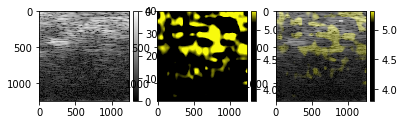

In [77]:
rf_data_1 = loadFile('5.5 pcf.txt')
datalength=np.size(rf_data,0);
alinenumber=np.size(rf_data,1);
scanstep=imagewidth/alinenumber;

rf_h_1 = envelope_detect(rf_data_1)

# B-mode
log_image1_1 = log_compression(rf_h_1)
plt.subplot(1,3,1)
bmap_1=resize(log_image1_1, (1247, 1247))
plt.imshow(bmap_1,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

# entropy imaging
paramap_1 = parametric_mapping(rf_h_1,
                               soundspeed_1,
                               pulselength,
                               samplingrate,
                               windowsize,
                               scanstep,
                               wor,
                               alinenumber,
                               datalength)
pmap_1=resize(paramap_1, (1247, 1247))
plt.subplot(1,3,2)
plt.imshow(pmap_1,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

# create hybrid image
hybrid_map=ImageOverlay(log_image1_1,40,0,paramap_1,5.32,3.8,0.3)
hmap_1=resize(hybrid_map, (1247, 1247,3))

# plot hybrid image
plt.subplot(1,3,3)
plt.imshow(hmap_1,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

## 7.5 PCF

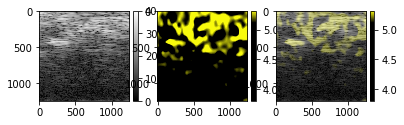

In [82]:
rf_data_2 = loadFile('7.5 pcf.txt')
datalength=np.size(rf_data,0);
alinenumber=np.size(rf_data,1);
scanstep=imagewidth/alinenumber;

rf_h_2 = envelope_detect(rf_data_2)

# B-mode
log_image1_2 = log_compression(rf_h_2)
plt.subplot(1,3,1)
bmap_2=resize(log_image1_2, (1247, 1247))
plt.imshow(bmap_2,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

# entropy imaging
paramap_2 = parametric_mapping(rf_h_2,soundspeed_2,pulselength,samplingrate,windowsize,scanstep,wor,alinenumber,datalength)
pmap_2=resize(paramap_2, (1247, 1247))
plt.subplot(1,3,2)
plt.imshow(pmap_2,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

# create hybrid image
hybrid_map=ImageOverlay(log_image1_2,40,0,paramap_2,5.32,3.8,0.3)
hmap_2=resize(hybrid_map, (1247, 1247,3))

# plot hybrid image
plt.subplot(1,3,3)
plt.imshow(hmap_2,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

## 15 PCF

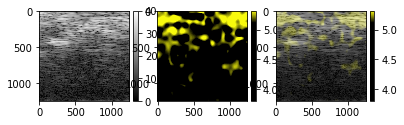

In [83]:
rf_data_3 = loadFile('15 pcf.txt')
datalength=np.size(rf_data,0);
alinenumber=np.size(rf_data,1);
scanstep=imagewidth/alinenumber;

rf_h_3 = envelope_detect(rf_data_3)

# B-mode
log_image1_3 = log_compression(rf_h_3)
plt.subplot(1,3,1)
bmap_3=resize(log_image1_3, (1247, 1247))
plt.imshow(bmap_3,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

# entropy imaging
paramap_3 = parametric_mapping(rf_h_3,soundspeed_3,pulselength,samplingrate,windowsize,scanstep,wor,alinenumber,datalength)
pmap_3=resize(paramap_3, (1247, 1247))
plt.subplot(1,3,2)
plt.imshow(pmap_3,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

# create hybrid image
hybrid_map=ImageOverlay(log_image1_3,40,0,paramap_3,5.32,3.8,0.3)
hmap_3=resize(hybrid_map, (1247, 1247,3))

# plot hybrid image
plt.subplot(1,3,3)
plt.imshow(hmap_3,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

## 20 PCF

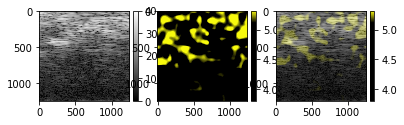

In [84]:
rf_data_4 = loadFile('20 pcf.txt')
datalength=np.size(rf_data,0);
alinenumber=np.size(rf_data,1);
scanstep=imagewidth/alinenumber;

rf_h_4 = envelope_detect(rf_data_4)

# B-mode
log_image1_4 = log_compression(rf_h_4)
plt.subplot(1,3,1)
bmap_4=resize(log_image1_4, (1247, 1247))
plt.imshow(bmap_4,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

# entropy imaging
paramap_4 = parametric_mapping(rf_h_4,soundspeed_4,pulselength,samplingrate,windowsize,scanstep,wor,alinenumber,datalength)
pmap_4=resize(paramap_4, (1247, 1247))
plt.subplot(1,3,2)
plt.imshow(pmap_4,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

# create hybrid image
hybrid_map=ImageOverlay(log_image1_4,40,0,paramap_4,5.32,3.8,0.3)
hmap_4=resize(hybrid_map, (1247, 1247,3))

# plot hybrid image
plt.subplot(1,3,3)
plt.imshow(hmap_4,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

## 30 PCF

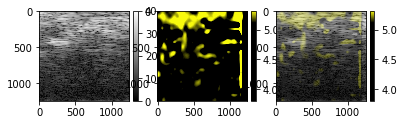

In [81]:
rf_data_5 = loadFile('30 pcf.txt')
datalength=np.size(rf_data,0);
alinenumber=np.size(rf_data,1);
scanstep=imagewidth/alinenumber;

rf_h_5 = envelope_detect(rf_data_5)

# B-mode
log_image1_5 = log_compression(rf_h_5)
plt.subplot(1,3,1)
bmap_5=resize(log_image1_5, (1247, 1247))
plt.imshow(bmap_5,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

# entropy imaging
paramap_5 = parametric_mapping(rf_h_5,soundspeed_5,pulselength,samplingrate,windowsize,scanstep,wor,alinenumber,datalength)
pmap_5=resize(paramap_5, (1247, 1247))
plt.subplot(1,3,2)
plt.imshow(pmap_5,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

# create hybrid image
hybrid_map=ImageOverlay(log_image1_5,40,0,paramap_5,5.32,3.8,0.3)
hmap_5=resize(hybrid_map, (1247, 1247,3))

# plot hybrid image
plt.subplot(1,3,3)
plt.imshow(hmap_5,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

# Results

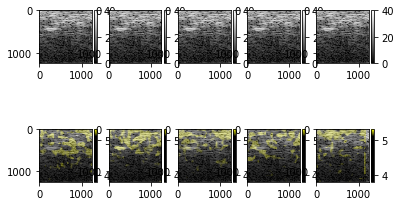

In [74]:
plt.subplot(2, 5, 1)
bmap_1=resize(log_image1_1, (1247, 1247))
plt.imshow(bmap_1,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

plt.subplot(2, 5, 2)
bmap_2=resize(log_image1_2, (1247, 1247))
plt.imshow(bmap_2,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

plt.subplot(2, 5, 3)
bmap_3=resize(log_image1_3, (1247, 1247))
plt.imshow(bmap_3,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

plt.subplot(2, 5, 4)
bmap_4=resize(log_image1_4, (1247, 1247))
plt.imshow(bmap_4,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)

plt.subplot(2, 5, 5)
bmap_5=resize(log_image1_5, (1247, 1247))
plt.imshow(bmap_5,cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(0,40)


plt.subplot(2, 5, 6)
plt.imshow(hmap_1,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

plt.subplot(2, 5, 7)
plt.imshow(hmap_2,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

plt.subplot(2, 5, 8)
plt.imshow(hmap_3,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

plt.subplot(2, 5, 9)
plt.imshow(hmap_4,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

plt.subplot(2, 5, 10)
plt.imshow(hmap_5,cmap=parula_map)
plt.colorbar(fraction=0.046, pad=0.04)
plt.clim(3.8,5.32)

![9.jpg](9.jpg)

![10.jpg](10.jpg)

   * Due to attenuation and reflection loss effects, it will reduce the amount of backscattered with increasing density of OCRF that caused entropy value decrease.
   
   * Compared to B-mode image, information theory entropy shows the change of microstructure at different density.
   
   * Information theory entropy may have an opportunity to diagnosis osteoporosis in clinical.